## Prevendo o Consumo de Energia de Carros Elétricos

### Uma empresa da área de transporte e logística deseja migrar sua frota para carros elétricos com o objetivo de reduzir os custos. Antes de tomar a decisão, a empresa gostaria de prever o consumo de energia de carros elétricos com base em diversos fatores de utilização e características dos veículos.

**Desta forma, iremos construir um modelo de Machine Learning capaz de prever o consumo de energia de carros elétricos com base em diversos fatores, tais como o tipo e número de motores elétricos do veículo, o peso do veículo, a capacidade de carga, entre outros atributos.**

- O conjunto de dados lista todos os carros totalmente elétricos com seus atributos (propriedades) disponíveis atualmente no mercado. A coleção não contém dados sobre carros híbridos e carros elétricos dos chamados “extensores de alcance”. Os carros a hidrogênio também não foram incluídos no conjunto de dados devido ao número insuficiente de modelos produzidos em massa e à especificidade diferente (em comparação com veículo elétrico) do veículo, incluindo os diferentes métodos de carregamento.
 - O conjunto de dados inclui carros que, a partir de 2 de dezembro de 2020, poderiam ser adquiridos na Polônia como novos em um revendedor autorizado e aqueles disponíveis em pré-venda pública e geral, mas apenas se uma lista de preços publicamente disponível com versões de equipamentos e parâmetros técnicos completos estivesse disponível. A lista não inclui carros descontinuados que não podem ser adquiridos como novos de um revendedor autorizado (também quando não estão disponíveis em estoque).
- O conjunto de dados de carros elétricos inclui todos os carros totalmente elétricos no mercado primário que foram obtidos de materiais oficiais (especificações técnicas e catálogos) fornecidos por fabricantes de automóveis com licença para vender carros na Polônia. Esses materiais foram baixados de seus sites oficiais. Caso os dados fornecidos pelo fabricante estivessem incompletos, as informações eram complementadas com dados do AutoCatálogo SAMAR.
- A base de dados composta por 53 carros elétricos (cada variante de um modelo – que difere em termos de capacidade da bateria, potência do motor, etc. – é tratada como separada) e 22 variáveis (25 variáveis, incluindo marca, modelo e “nome do carro” mesclando estes dois anteriores).
- O Dataset está disponível em: https://data.mendeley.com/datasets/tb9yrptydn/2

In [1]:
# Carregando a biblioteca readxl para leitura do arquivo
library(readxl)
# Para manipulação dos dados
library(dplyr)
# Modelo randomForest para criar um plot de importância das variáveis
library(randomForest)
# Para criação de gráficos
library(ggplot2)
# Divide os dados em dados de teste e treino
library(caTools)

Warning message:
"package 'readxl' was built under R version 4.2.3"
Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'randomForest' was built under R version 4.2.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine


Warning message:
"package 'ggplot2' was built under R version 4.2.3"

Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Warning message:
"package 'caTools' was built under R version 4.2.3"


In [2]:
# leitura do arquivo com a biblioteca readxl
dados <- read_xlsx('FEV-data-Excel.xlsx')

# Visualização dos dados e dimensões
head(dados)
dim(dados)

Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],⋯,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95,438,⋯,3130,640,5,5,19,200,660,5.7,150,24.45
Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71,340,⋯,3040,670,5,5,19,190,660,6.8,150,23.80
Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95,364,⋯,3130,565,5,5,20,210,660,4.5,150,27.55
Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71,346,⋯,3040,640,5,5,19,190,615,6.8,150,23.30
Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95,447,⋯,3130,670,5,5,19,200,615,5.7,150,23.85
Audi e-tron Sportback S quattro,Audi,e-tron Sportback S quattro,426200,503,973,disc (front + rear),4WD,95,369,⋯,3130,565,5,5,20,210,615,4.5,150,27.20


[1] 53 25

In [3]:
# Estrutura dos dados  com a biblioteca Dplyr
glimpse(dados)

Rows: 53
Columns: 25
$ `Car full name`                          <chr> "Audi e-tron 55 quattro", "Au…
$ Make                                     <chr> "Audi", "Audi", "Audi", "Audi…
$ Model                                    <chr> "e-tron 55 quattro", "e-tron …
$ `Minimal price (gross) [PLN]`            <dbl> 345700, 308400, 414900, 31970…
$ `Engine power [KM]`                      <dbl> 360, 313, 503, 313, 360, 503,…
$ `Maximum torque [Nm]`                    <dbl> 664, 540, 973, 540, 664, 973,…
$ `Type of brakes`                         <chr> "disc (front + rear)", "disc …
$ `Drive type`                             <chr> "4WD", "4WD", "4WD", "4WD", "…
$ `Battery capacity [kWh]`                 <dbl> 95.0, 71.0, 95.0, 71.0, 95.0,…
$ `Range (WLTP) [km]`                      <dbl> 438, 340, 364, 346, 447, 369,…
$ `Wheelbase [cm]`                         <dbl> 292.8, 292.8, 292.8, 292.8, 2…
$ `Length [cm]`                            <dbl> 490.1, 490.1, 490.2, 490.1, 4…
$ `Width [cm]`     

### Dicionário de dados:
- full name: Nome completo
- Make: Fabricante
- Model: Modelo
- Minimal price (gross) [PLN]: Preço mínimo (bruto) [PLN]
- Engine power [KM]: Potência do motor [KM]
- Maximum torque [Nm]: Torque máximo [Nm]
- Type of brakes: Tipo de freios
- Drive type: Tipo de tração
- Battery capacity [kWh]: Capacidade da bateria [kWh]
- Range (WLTP) [km]: Autonomia (WLTP) [km]
- Wheelbase [cm]: Distância entre eixos [cm]
- Length [cm]: Comprimento [cm]
- Width [cm]: Largura [cm] 
- Height [cm]: Altura [cm] 
- Minimal empty weight [kg]:Peso mínimo vazio [kg]  
- Permissable gross weight [kg]: Peso bruto permitido [kg]
- Maximum load capacity [kg]: Capacidade máxima de carga [kg]
- Number of seats: Número de assentos
- Number of doors: Número de portas
- Tire size [in]: Tamanho dos pneus [pol.]
- Maximum speed [kph]: Velocidade máxima [km/h]
- Boot capacity (VDA) [l]: Capacidade do porta-malas (VDA) [litros]
- Acceleration 0-100 kph [s]: Aceleração 0-100 km/h [s]
- Maximum DC charging power [kW]: Potência máxima de carga CC [kW]
- mean - Energy consumption [kWh/100 km]: Média - Consumo de energia [kWh/100 km]

In [4]:
# Armazenando o DataFrame em uma nova variável pra realizar alterações
dados_1 <- dados

In [5]:
# Criando um vetor para renomear as colunas:
novos_nomes <- c('Nome', 'Fabricante', 'Modelo', 'Preco_minimo_bruto', 'Potencia_motor_km', 'Torque_maximo_nm', 'Tipo_freio',
                'Tipo_tracao','Capacidade_bateria_kwh','Autonomia_km','Distancia_eixos_cm', 'Comprimento_cm','Largura_cm',
                 'Altura_cm', 'Peso_minimo_vazio_kg','Peso_bruto_permitido_kg','Capacidade_máxima_carga_kg', 'Numero_assentos',
                 'Numero_portas', 'Tamanho_pneus','Velocidade_maxima_kmh', 'Capacidade_porta_malas_L','Aceleracao_kmh', 
                 'Potencia_maxima_carga_kw', 'Consumo_energia_medio_kwh_100km')

In [6]:
# Renomeando as colunas
colnames(dados_1) <- novos_nomes

# Visualização dos dados
head(dados_1)
dim(dados_1)

Nome,Fabricante,Modelo,Preco_minimo_bruto,Potencia_motor_km,Torque_maximo_nm,Tipo_freio,Tipo_tracao,Capacidade_bateria_kwh,Autonomia_km,⋯,Peso_bruto_permitido_kg,Capacidade_máxima_carga_kg,Numero_assentos,Numero_portas,Tamanho_pneus,Velocidade_maxima_kmh,Capacidade_porta_malas_L,Aceleracao_kmh,Potencia_maxima_carga_kw,Consumo_energia_medio_kwh_100km
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95,438,⋯,3130,640,5,5,19,200,660,5.7,150,24.45
Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71,340,⋯,3040,670,5,5,19,190,660,6.8,150,23.80
Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95,364,⋯,3130,565,5,5,20,210,660,4.5,150,27.55
Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71,346,⋯,3040,640,5,5,19,190,615,6.8,150,23.30
Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95,447,⋯,3130,670,5,5,19,200,615,5.7,150,23.85
Audi e-tron Sportback S quattro,Audi,e-tron Sportback S quattro,426200,503,973,disc (front + rear),4WD,95,369,⋯,3130,565,5,5,20,210,615,4.5,150,27.20


[1] 53 25

In [7]:
# Convertendo as colunas modelo, fabricante, tipo de freio, tração,  número de assentos e portas em fatores
# Estas variáveis são consideradas categóricas porque representam características de cada veículo.
dados_1$Modelo <- as.factor(dados_1$Modelo)
dados_1$Fabricante <- as.factor(dados_1$Fabricante)
dados_1$Tipo_freio <- as.factor(dados_1$Tipo_freio)
dados_1$Tipo_tracao <- as.factor(dados_1$Tipo_tracao)
dados_1$Numero_assentos <- as.factor(dados_1$Numero_assentos)
dados_1$Numero_portas <- as.factor(dados_1$Numero_portas)

In [8]:
#Estrutura dos dados
str(dados_1)

tibble [53 × 25] (S3: tbl_df/tbl/data.frame)
 $ Nome                           : chr [1:53] "Audi e-tron 55 quattro" "Audi e-tron 50 quattro" "Audi e-tron S quattro" "Audi e-tron Sportback 50 quattro" ...
 $ Fabricante                     : Factor w/ 20 levels "Audi","BMW","Citroën",..: 1 1 1 1 1 1 2 2 2 3 ...
 $ Modelo                         : Factor w/ 53 levels "Citigo-e iV",..: 16 15 17 18 19 20 28 29 34 8 ...
 $ Preco_minimo_bruto             : num [1:53] 345700 308400 414900 319700 357000 ...
 $ Potencia_motor_km              : num [1:53] 360 313 503 313 360 503 170 184 286 136 ...
 $ Torque_maximo_nm               : num [1:53] 664 540 973 540 664 973 250 270 400 260 ...
 $ Tipo_freio                     : Factor w/ 2 levels "disc (front + rear)",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Tipo_tracao                    : Factor w/ 3 levels "2WD (front)",..: 3 3 3 3 3 3 2 2 2 1 ...
 $ Capacidade_bateria_kwh         : num [1:53] 95 71 95 71 95 95 42.2 42.2 80 50 ...
 $ Autonomia_km           

In [9]:
# Verificando valores nulos
data.frame(colSums(is.na(dados_1)))

,colSums.is.na.dados_1..
,<dbl>
Nome,0
Fabricante,0
Modelo,0
Preco_minimo_bruto,0
Potencia_motor_km,0
Torque_maximo_nm,0
Tipo_freio,1
Tipo_tracao,0
Capacidade_bateria_kwh,0


In [10]:
# Resumo estatistico 
summary(dados_1)

     Nome                Fabricante                   Modelo  
 Length:53          Tesla     : 7   Citigo-e iV          : 1  
 Class :character   Audi      : 6   Cooper SE            : 1  
 Mode  :character   Kia       : 4   Corsa-e              : 1  
                    Porsche   : 4   DS3 Crossback e-tense: 1  
                    Volkswagen: 4   e                    : 1  
                    BMW       : 3   e-2008               : 1  
                    (Other)   :25   (Other)              :47  
 Preco_minimo_bruto Potencia_motor_km Torque_maximo_nm
 Min.   : 82050     Min.   : 82.0     Min.   : 160    
 1st Qu.:142900     1st Qu.:136.0     1st Qu.: 260    
 Median :178400     Median :204.0     Median : 362    
 Mean   :246159     Mean   :269.8     Mean   : 460    
 3rd Qu.:339480     3rd Qu.:372.0     3rd Qu.: 640    
 Max.   :794000     Max.   :772.0     Max.   :1140    
                                                      
                      Tipo_freio      Tipo_tracao Capaci

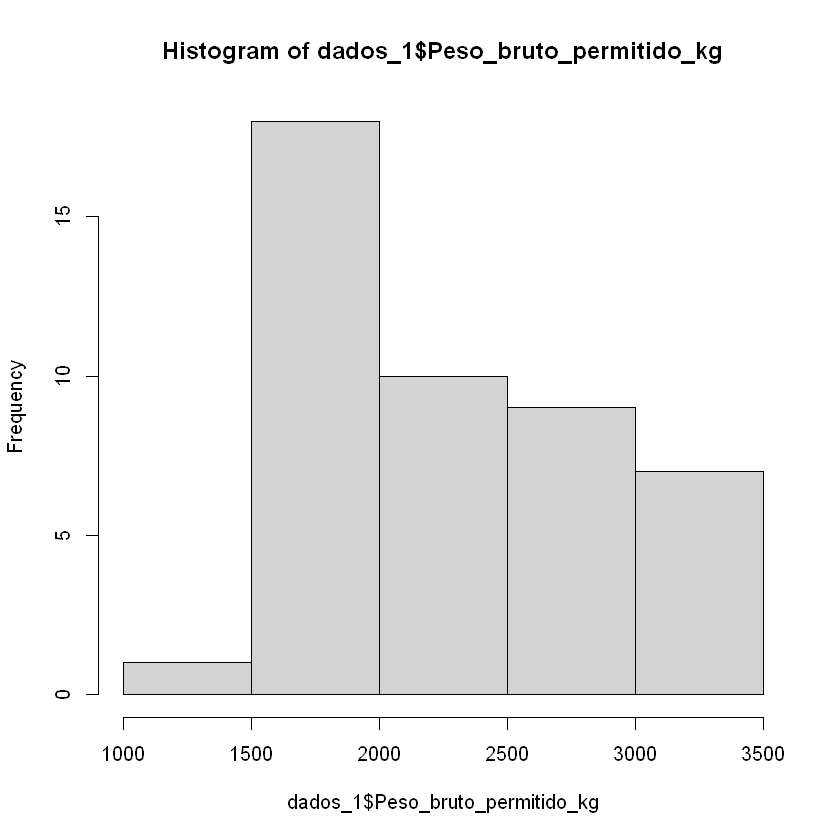

In [11]:
# Visualizando a distribuição dos dados de colunas valores faltantes
hist(dados_1$Peso_bruto_permitido_kg)

**A distribuição é assimétrica positiva (à direita). Isso indica que a cauda direita da distribuição é mais longa, e a maioria dos valores está concentrada à esquerda da média (a média é maior que a mediana), desta forma, vamos optar por substituir os valores ausentes pela mediana, que é uma medida mais robusta nestas condições, uma vez que não depende da magnitude dos dados.**

In [12]:
# Substituindo valores ausentes pela mediana 
dados_1$Peso_bruto_permitido_kg <- ifelse(is.na(dados_1$Peso_bruto_permitido_kg),
                                          median(dados_1$Peso_bruto_permitido_kg, na.rm = TRUE),
                                          dados_1$Peso_bruto_permitido_kg)

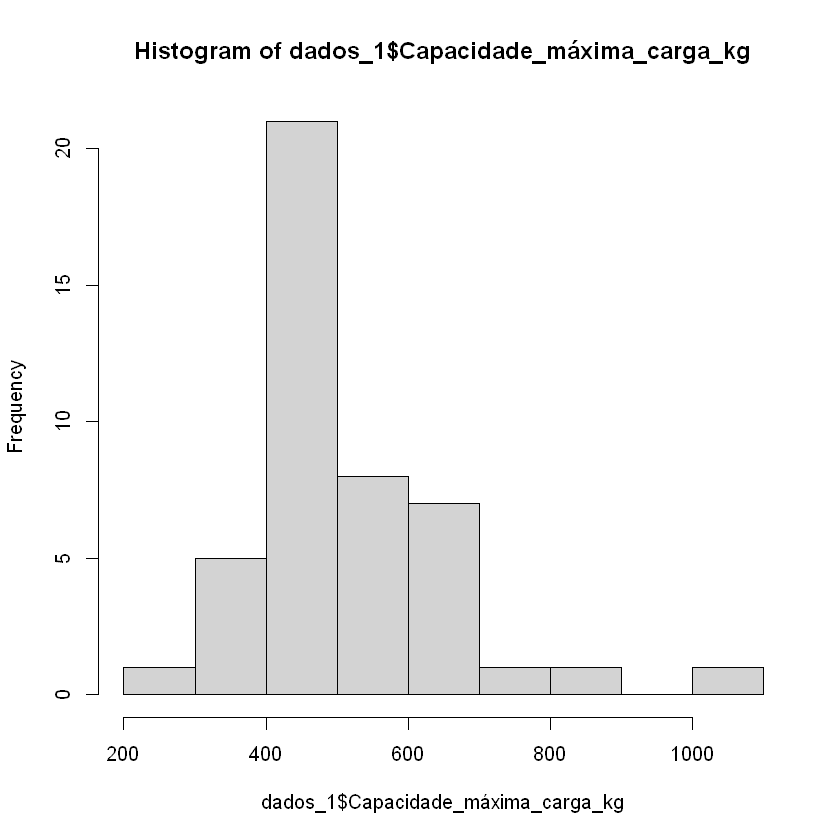

In [13]:
# Histograma para Potencia Maxima Carga 
hist(dados_1$Capacidade_máxima_carga_kg)

**A distribuição é assimétrica positiva (à direita). Isso indica que a cauda direita da distribuição é mais longa, e a maioria dos valores está concentrada à esquerda da média (a média é maior que a mediana), desta forma, vamos optar por substituir os valores ausentes pela mediana, que é uma medida mais robusta nestas condições, uma vez que não depende da magnitude dos dados.**

In [14]:
# Devido a forma de distribuição e presença de outlier, vamos substituir valores ausentes pela mediana 
dados_1$Capacidade_máxima_carga_kg <- ifelse(is.na(dados_1$Capacidade_máxima_carga_kg),
                                          median(dados_1$Capacidade_máxima_carga_kg, na.rm = TRUE),
                                          dados_1$Capacidade_máxima_carga_kg)

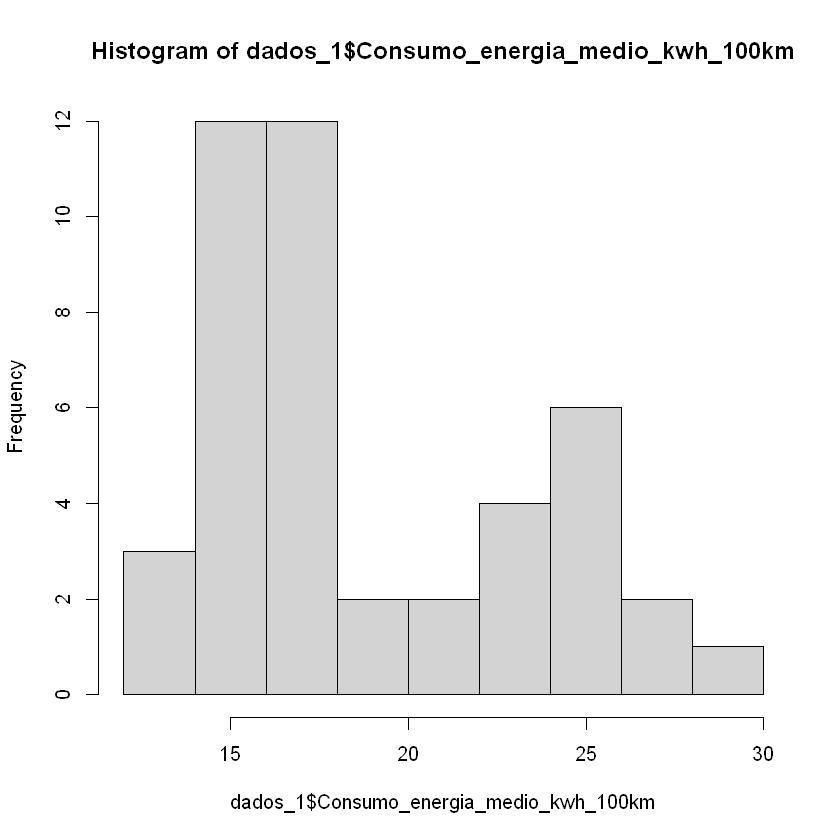

In [15]:
# Histograma para Consumo Energia Medio
hist(dados_1$Consumo_energia_medio_kwh_100km)

**A distribuição é assimétrica positiva (à direita). Isso indica que a cauda direita da distribuição é mais longa, e a maioria dos valores está concentrada à esquerda da média (a média é maior que a mediana), desta forma, vamos optar por substituir os valores ausentes pela mediana, que é uma medida mais robusta nestas condições, uma vez que não depende da magnitude dos dados.**

In [16]:
#vamos substituir valores ausentes pela mediana 
dados_1$Consumo_energia_medio_kwh_100km <- ifelse(is.na(dados_1$Consumo_energia_medio_kwh_100km),
                                          median(dados_1$Consumo_energia_medio_kwh_100km, na.rm = TRUE),
                                          dados_1$Consumo_energia_medio_kwh_100km)

In [17]:
# Verificando novamente valores nulos
data.frame(colSums(is.na(dados_1)))

,colSums.is.na.dados_1..
,<dbl>
Nome,0
Fabricante,0
Modelo,0
Preco_minimo_bruto,0
Potencia_motor_km,0
Torque_maximo_nm,0
Tipo_freio,1
Tipo_tracao,0
Capacidade_bateria_kwh,0


In [18]:
# Removendo demais valores ausentes
dados_1 <- na.omit(dados_1)
dim(dados_1) # Verificando a quantidade de linhas removidas

[1] 50 25

**Como foram apenas três linhas removidas vamos manter esta alteração ao invés de tratar estes dados isoladamente.**

## Modelos

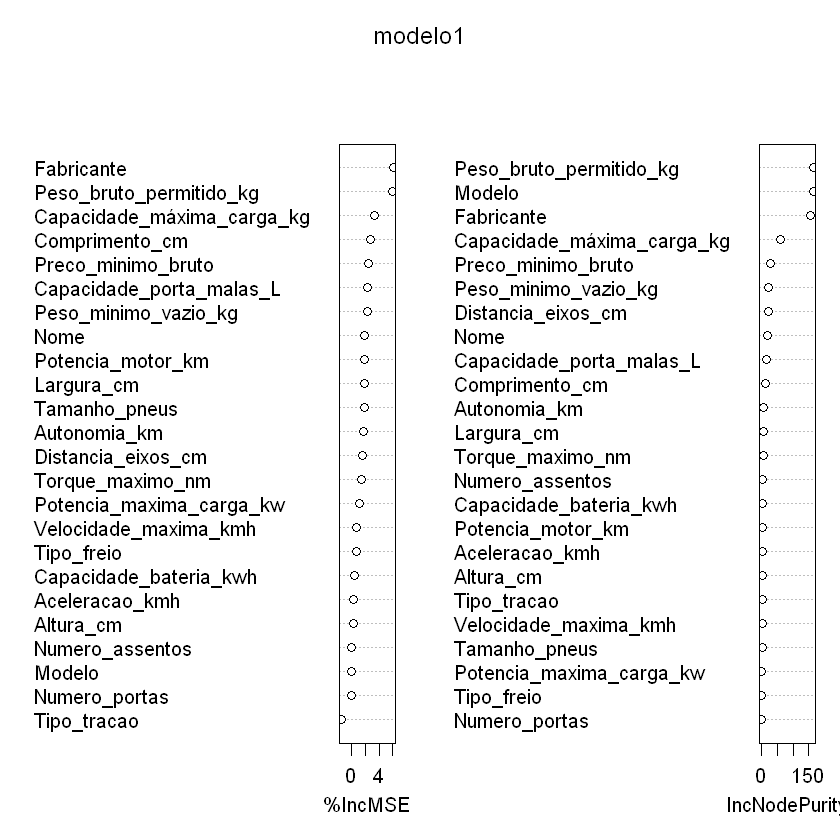

In [19]:
# Verificando a importância das variáveis com a biblioteca randomForest
set.seed(50)  # para reprodutibilidade
modelo1 <- randomForest(Consumo_energia_medio_kwh_100km ~ .,
                        data = dados_1, 
                        ntree = 100, nodesize = 10, importance = T)
varImpPlot(modelo1)

### Seleção de variáveis:

 #### Variáveis não incluídas:
- Capacidade_máxima_carga_kg: Refere-se à capacidade máxima de carga que o veículo pode suportar.
- Peso_minimo_vazio_kg: Indica o peso mínimo do veículo quando está vazio
     - Como a soma do peso mínimo vazio (Peso_minimo_vazio_kg) e da capacidade máxima de carga (Capacidade_máxima_carga_kg) geralmente se aproxima do conceito de peso bruto permitido (Peso_bruto_permitido_kg) não vamos escolher estas duas variáveis **e vamos optar por manter apenas a variável Peso_bruto_permitido_kg que apresenta maior importância.**
 
#### Variáveis escolhidas:

- Fabricante
- Peso_bruto_permitido_kg
- Comprimento_cm
- Preco_minimo_bruto
- Capacidade_porta_malas_L





### Gráficos das variáveis mais importantes e variável preditora:

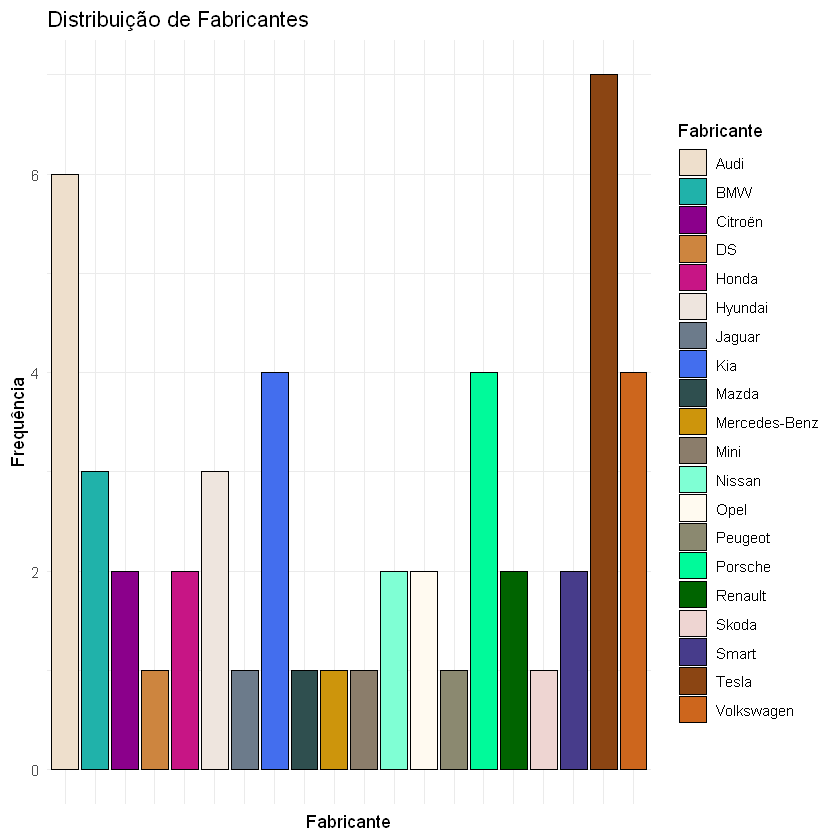

In [20]:
# Histograma para Distribuição de Fabricantes com a biblioteca ggplot2
ggplot(dados_1, aes(x = Fabricante)) +
  geom_bar(aes(fill = Fabricante), color = 'black', position = 'dodge') +
  scale_fill_manual(values = c('antiquewhite2', 'lightseagreen', 'darkmagenta', 'peru', 'mediumvioletred', 'seashell2', 
                               'slategray4', 'royalblue2', 'darkslategrey', 'darkgoldenrod3', 'bisque4', 'aquamarine1', 
                               'floralwhite', 'lemonchiffon4', 'mediumspringgreen', 'darkgreen', 'mistyrose2', 'slateblue4', 
                               'saddlebrown',  'chocolate3')) + #Cores
  labs(title = 'Distribuição de Fabricantes', x = 'Fabricante', y = 'Frequência') +
  theme_minimal() +
  theme(axis.text.x = element_blank()) # Remove a legenda do eixo x

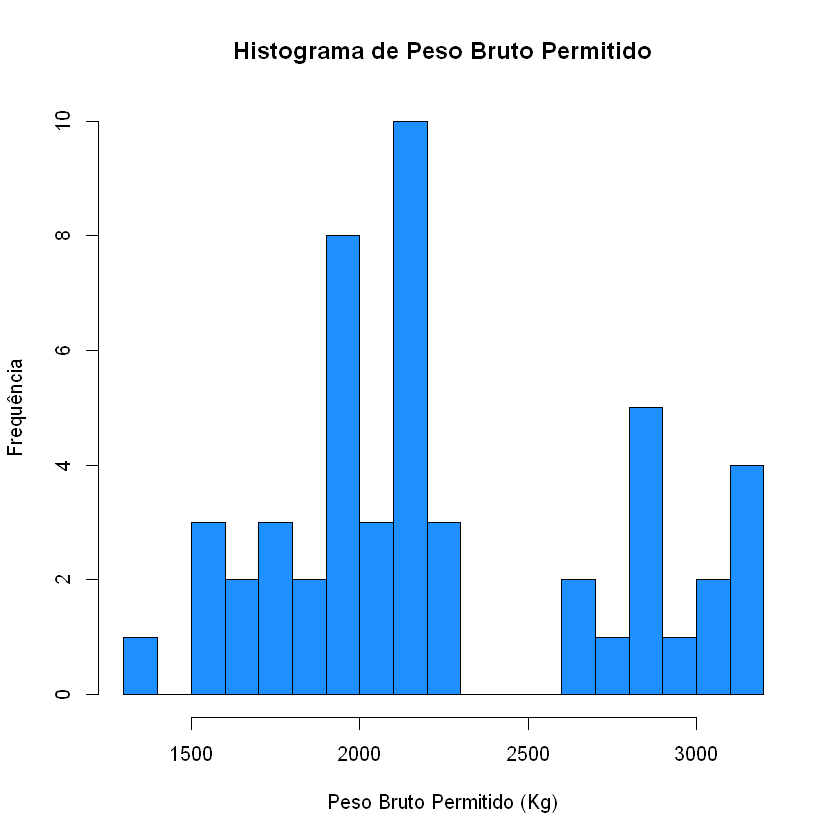

In [21]:
hist(dados_1$Peso_bruto_permitido_kg, breaks = 20, 
     main = 'Histograma de Peso Bruto Permitido',
     xlab = 'Peso Bruto Permitido (Kg)',
     ylab = 'Frequência',
     col = 'dodgerblue', 
     border = 'black' )

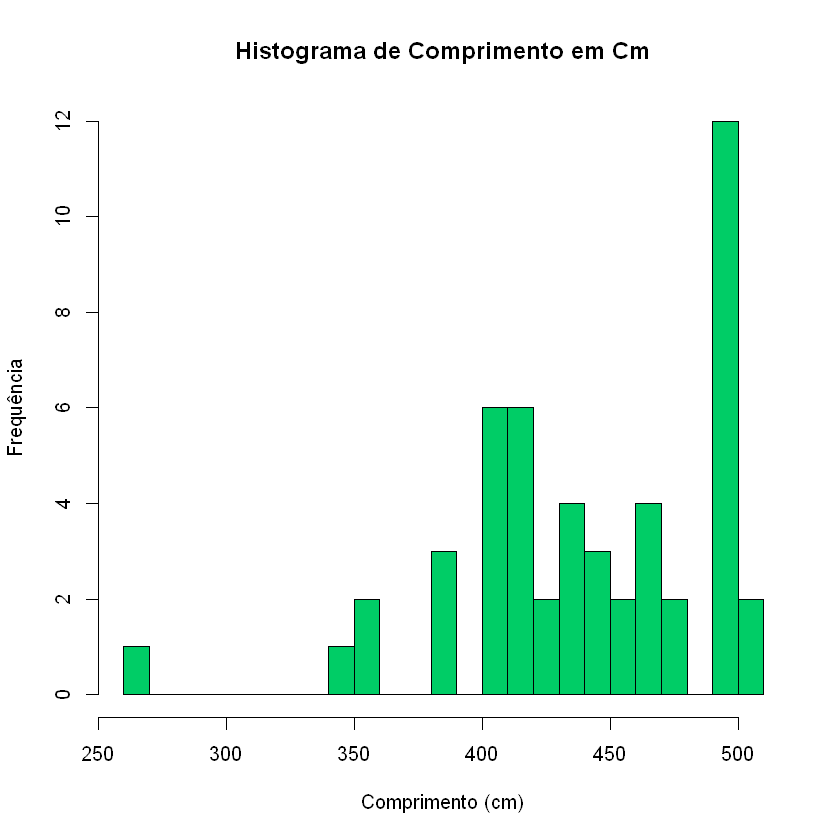

In [22]:
hist(dados_1$Comprimento_cm, breaks = 20, 
     main = 'Histograma de Comprimento em Cm',
     xlab = 'Comprimento (cm)',
     ylab = 'Frequência',
     col = 'springgreen3', 
     border = 'black' )

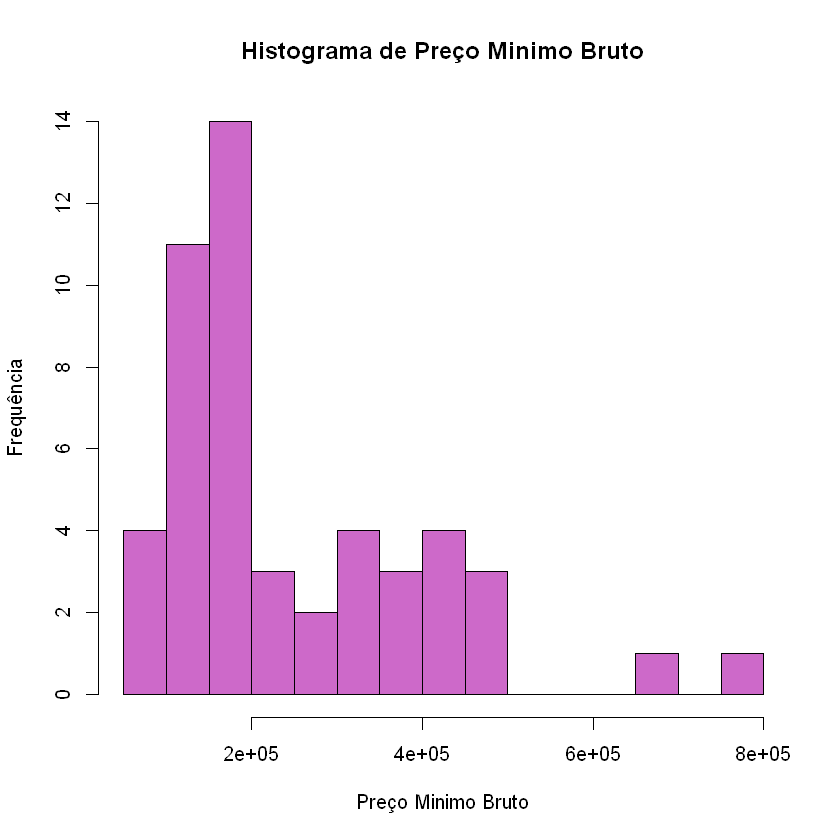

In [23]:
hist(dados_1$Preco_minimo_bruto, breaks = 20, 
     main = 'Histograma de Preço Minimo Bruto',
     xlab = 'Preço Minimo Bruto',
     ylab = 'Frequência',
     col = 'orchid3', 
     border = 'black' )

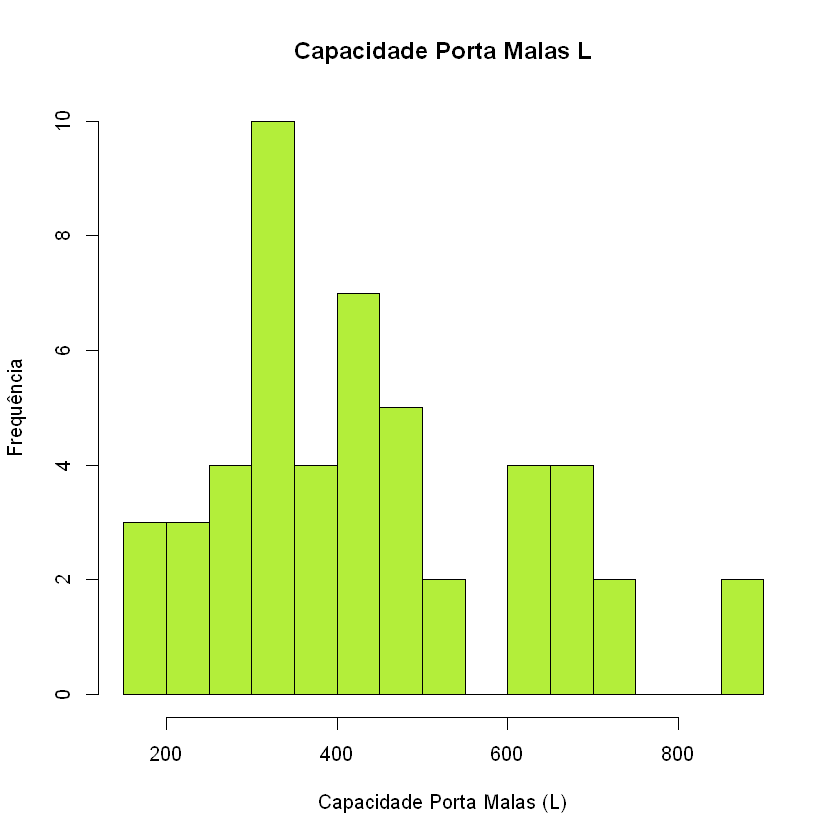

In [24]:
hist(dados_1$Capacidade_porta_malas_L, breaks = 20, 
     main = 'Capacidade Porta Malas L',
     xlab = 'Capacidade Porta Malas (L)',
     ylab = 'Frequência',
     col = 'olivedrab2', 
     border = 'black' )

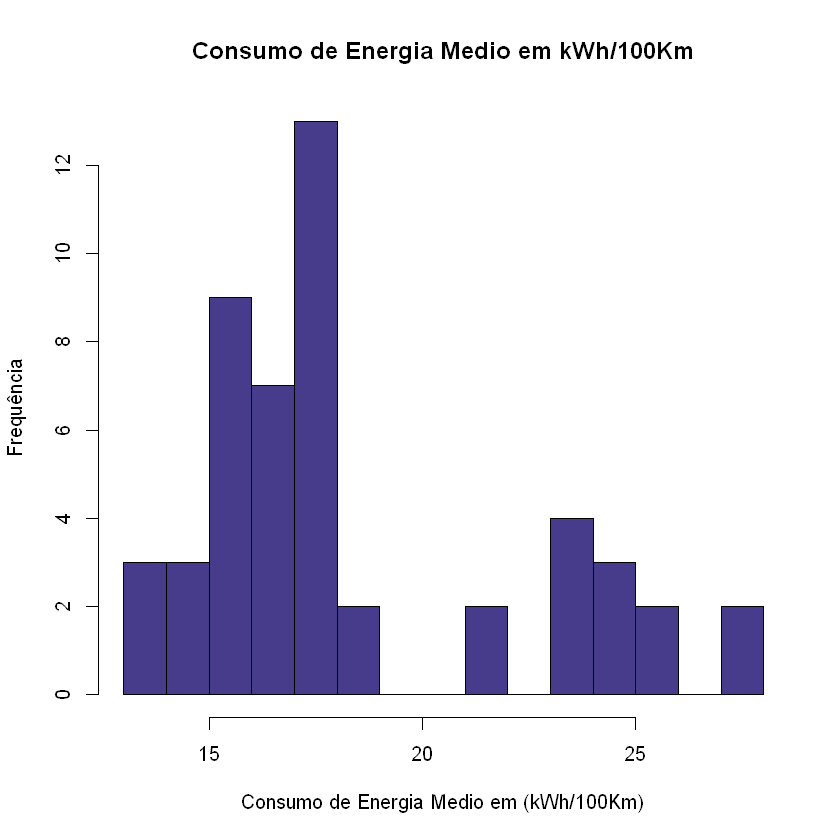

In [25]:
hist(dados_1$Consumo_energia_medio_kwh_100km, breaks = 20, 
     main = 'Consumo de Energia Medio em kWh/100Km',
     xlab = 'Consumo de Energia Medio em (kWh/100Km)',
     ylab = 'Frequência',
     col = 'slateblue4', 
     border = 'black' )

### Observamos um padrão nas distribuições de frequência entre três variáveis preditoras numéricas e a variável alvo. Esta consistência é importante para a criação do modelo, pois indica que as características que influenciam as variáveis preditoras mantêm uma relação estável com a variável alvo.

### Verificando multicolinearidade entre as variáveis numéricas:

In [26]:
# Armazenando colunas numericas para verificar multicolinearidade
colunas_interesse <- c('Consumo_energia_medio_kwh_100km', 'Peso_bruto_permitido_kg', 'Comprimento_cm', 'Preco_minimo_bruto',
                       'Capacidade_porta_malas_L')
                       
# Criando dataframe apenas com colunas de interesse
dados_colunas_relevantes <- dados_1[colunas_interesse]

# Calculando a matriz de correlação e verificando multicolinearidade
cor_matrix <- cor(dados_colunas_relevantes)
cor_matrix

,Consumo_energia_medio_kwh_100km,Peso_bruto_permitido_kg,Comprimento_cm,Preco_minimo_bruto,Capacidade_porta_malas_L
Consumo_energia_medio_kwh_100km,1.0000000,0.8762153,0.5992937,0.7032231,0.5248615
Peso_bruto_permitido_kg,0.8762153,1.0000000,0.7848402,0.6887002,0.6493304
Comprimento_cm,0.5992937,0.7848402,1.0000000,0.7497626,0.8294602
Preco_minimo_bruto,0.7032231,0.6887002,0.7497626,1.0000000,0.6368423
Capacidade_porta_malas_L,0.5248615,0.6493304,0.8294602,0.6368423,1.0000000


### Verificamos que entre as variáveis númericas há multicolinearidade, ou seja, as variáveis independentes em um modelo de regressão estão altamente correlacionadas entre si. Vamos optar manter apenas a variável Peso_bruto_permitido_kg que apresenta maior correlação com a variável alvo e realizar o treinamento do modelo. Caso seja necessário, posteriormente podemos aplicar engenharia de atributos nas demais variáveis. 

In [27]:
# Divindo os dados em dados de teste e treino com a biblioteca caTools
set.seed(70) # para reprodutibilidade
split = sample.split(dados_1$Fabricante, SplitRatio = 0.65)

In [28]:
# Datasets de treino e de teste
dados_treino = subset(dados_1, split == TRUE)
dados_teste = subset(dados_1, split == FALSE)
dim(dados_treino)
dim(dados_teste)

[1] 35 25

[1] 15 25

### Há 20 categorias para a coluna Fabricante em um conjunto de dados relativamente pequeno, precisamos garantir que todas as categorias estejam presentes nos dados de treino.

In [29]:
dados_treino$Fabricante

[1] Audi          Audi          Audi          Audi          BMW          
 [6] BMW           Citroën       DS            Honda         Hyundai      
[11] Hyundai       Jaguar        Kia           Kia           Kia          
[16] Mazda         Mercedes-Benz Mini          Nissan        Opel         
[21] Peugeot       Porsche       Porsche       Porsche       Renault      
[26] Skoda         Smart         Tesla         Tesla         Tesla        
[31] Tesla         Tesla         Volkswagen    Volkswagen    Volkswagen   
20 Levels: Audi BMW Citroën DS Honda Hyundai Jaguar Kia Mazda ... Volkswagen

In [30]:
dados_teste$Fabricante

[1] Audi       Audi       BMW        Honda      Hyundai    Kia       
 [7] Nissan     Opel       Porsche    Renault    Smart      Tesla     
[13] Tesla      Volkswagen Citroën   
20 Levels: Audi BMW Citroën DS Honda Hyundai Jaguar Kia Mazda ... Volkswagen

In [31]:
# Treinando o modelo com as duas variáveis que apresentaram maior importância
modelo_2 <- lm(Consumo_energia_medio_kwh_100km ~ Peso_bruto_permitido_kg + Fabricante,  data = dados_treino)
summary(modelo_2)


Call:
lm(formula = Consumo_energia_medio_kwh_100km ~ Peso_bruto_permitido_kg + 
    Fabricante, data = dados_treino)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0547  0.0000  0.0000  0.2021  1.8349 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             13.1792537  3.0546689   4.314 0.000713 ***
Peso_bruto_permitido_kg  0.0040051  0.0009659   4.147 0.000988 ***
FabricanteBMW           -6.1505409  1.2999284  -4.731 0.000322 ***
FabricanteCitroën       -4.1393881  1.6602855  -2.493 0.025804 *  
FabricanteDS            -5.4892614  1.6759445  -3.275 0.005527 ** 
FabricanteHonda         -3.4086534  1.7537914  -1.944 0.072325 .  
FabricanteHyundai       -6.8697428  1.4041202  -4.893 0.000238 ***
FabricanteJaguar        -2.6727831  1.3382313  -1.997 0.065616 .  
FabricanteKia           -4.9140357  1.4810089  -3.318 0.005077 ** 
FabricanteMazda         -7.1659911  1.5886667  -4.511 0.000489 ***
FabricanteMercedes-Benz -3.1041512  

In [32]:
# Fazendo previsões com os dados de teste
previsao <- predict(modelo_2, dados_teste)

**Não é necessário excluir a variável alvo (variável dependente) ao fazer previsões com um modelo de regressão linear (lm) no R. A função predict no R já está configurada para lidar com isso.  Quando usamos a função predict para fazer previsões em um conjunto de dados de teste ou novos dados, o modelo automaticamente considera as variáveis independentes para gerar previsões para a variável dependente.**

In [33]:
# Comparando os valores previstos pelo modelo com os valores reais
resultados <- cbind(previsao, dados_teste$Consumo_energia_medio_kwh_100km)
colnames(resultados) <-c('Previsao', ' Real')
resultados <- data.frame(resultados)
resultados

,Previsao,X.Real
,<dbl>,<dbl>
1,25.35466,23.80
2,25.71511,23.85
3,13.95748,14.30
4,17.26008,17.50
5,14.39975,15.00
6,16.59576,15.30
7,19.08073,17.10
8,17.04650,17.60
9,24.46335,24.10


### Calculando os erros do modelo
Vamos medir o quanto os valores previstos do modelo diferem dos valores reais e consequentemente avaliar o desempenho de regressão: 
- MSE (Mean Squared Error):O MSE é calculado como a média dos quadrados dos erros entre os valores previstos pelo modelo e os valores reais, penalizando mais fortemente erros maiores, já que eles são elevados ao quadrado. Portanto, valores mais altos no MSE indicam um desempenho pior do modelo, enquanto valores menores indicam um desempenho melhor.
- Em geral, um MSE mais próximo de zero é desejável, indicando que as previsões do modelo estão mais próximas dos valores reais.

In [34]:
#Calculando o erro médio:
MSE <- mean((resultados$X.Real - resultados$Previsao)^2)
MSE

[1] 2.5156

 - RMSE (Root Mean Squared Error): O RMSE é simplesmente a raiz quadrada do MSE. Ele tem a vantagem de estar na mesma unidade que a variável de interesse, tornando mais fácil a interpretação.

In [35]:
RMSE <- MSE^0.5
RMSE

[1] 1.586064

### Sumário do modelo

In [36]:
summary(modelo_2)


Call:
lm(formula = Consumo_energia_medio_kwh_100km ~ Peso_bruto_permitido_kg + 
    Fabricante, data = dados_treino)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.0547  0.0000  0.0000  0.2021  1.8349 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             13.1792537  3.0546689   4.314 0.000713 ***
Peso_bruto_permitido_kg  0.0040051  0.0009659   4.147 0.000988 ***
FabricanteBMW           -6.1505409  1.2999284  -4.731 0.000322 ***
FabricanteCitroën       -4.1393881  1.6602855  -2.493 0.025804 *  
FabricanteDS            -5.4892614  1.6759445  -3.275 0.005527 ** 
FabricanteHonda         -3.4086534  1.7537914  -1.944 0.072325 .  
FabricanteHyundai       -6.8697428  1.4041202  -4.893 0.000238 ***
FabricanteJaguar        -2.6727831  1.3382313  -1.997 0.065616 .  
FabricanteKia           -4.9140357  1.4810089  -3.318 0.005077 ** 
FabricanteMazda         -7.1659911  1.5886667  -4.511 0.000489 ***
FabricanteMercedes-Benz -3.1041512  

### Residuals:
**Esta seção mostra um resumo estatístico dos resíduos (diferença entre os valores observados e os valores previstos pelo modelo).**

- **Min, 1Q, Median, 3Q, Max** descrevem a distribuição dos resíduos. Seu objetivo é que esses valores sejam distribuídos simetricamente em torno de zero. É importante notar que a mediana e os quartis estão em 0, o que sugere que a distribuição dos resíduos é simétrica em torno de zero. Isso é uma boa indicação de que o modelo não está tendencioso (ou seja, os erros não têm uma tendência sistemática).


### Coefficients:
 Exemplos:
- **Estimate (Estimativa) para Peso_bruto_permitido_kg:** Para cada aumento de uma unidade no "Peso_bruto_permitido_kg", espera-se um aumento de 0.0040051 unidades na variável dependente, mantendo todas as outras variáveis constantes.
- **Estimate (Estimativa) para FabricanteBMW:** Se a variável binária "FabricanteBMW" for igual a 1 (indicando que o fabricante é a BMW), espera-se uma diminuição de 6.1505409 unidades na variável dependente em comparação com a referência (quando "FabricanteBMW" é 0).
- **Std. Error:** O erro padrão dos coeficientes, uma medida da variação dos coeficientes.
- **t value:** A estatística t, usada para testar a hipótese nula de que o coeficiente é igual a zero (sem efeito). Quanto mais distante de zero (positivo ou negativo) for o valor t, mais significativo é o coeficiente. 
- **Pr(>|t|):**  Este é o valor p associado ao teste t. Ele indica a probabilidade de observar um valor t tão extremo quanto o observado, assumindo que a hipótese nula é verdadeira (hipótese nula: o coeficiente é zero) Isso significa que o coeficiente é estatisticamente significativo para prever a variável alvo. 


### Outras estatísticas:
**Esta seção descreve os coeficientes do modelo de regressão.**

 - **Residual Standard Error (Erro Padrão Residual):** Este é o desvio padrão dos resíduos, ou seja, das diferenças entre os valores reais e os valores previstos pelo modelo. Quanto menor o Residual Standard Error, melhor o modelo se ajusta aos dados.  

- **Multiple R-squared (R²):** Essa métrica indica a proporção da variabilidade na variável de resposta que é explicada pelo modelo. Neste caso, o R² é 0.9653, o que significa que aproximadamente 96,53% da variabilidade é explicada pelas variáveis independentes no modelo.  

- **Adjusted R-squared (R² Ajustado):** O R² ajustado leva em consideração o número de variáveis independentes no modelo, penalizando a inclusão de variáveis que não melhoram significativamente a explicação da variabilidade. O valor é 0.9157, o que pode indicar o quão bem o modelo se ajusta aos dados, levando em conta o número de variáveis explicativas.  

- **F-statistic (Estatística F):** A estatística F avalia a significância global do modelo. Valores mais altos indicam um modelo mais significativo. Neste caso, a estatística F é 19.46, com 20 e 14 graus de liberdade para o numerador e o denominador, respectivamente.  

- **p-value (Valor p):** O valor p associado à estatística F indica a probabilidade de observar uma estatística F tão extrema quanto a observada, supondo que a hipótese nula (todos os coeficientes de regressão são zero) seja verdadeira. Um valor p muito baixo (como 5.274e-07) sugere que o modelo como um todo é estatisticamente significativo.

### Verificando os resíduos do modelo:


In [37]:
residuos <- resid(modelo_2)

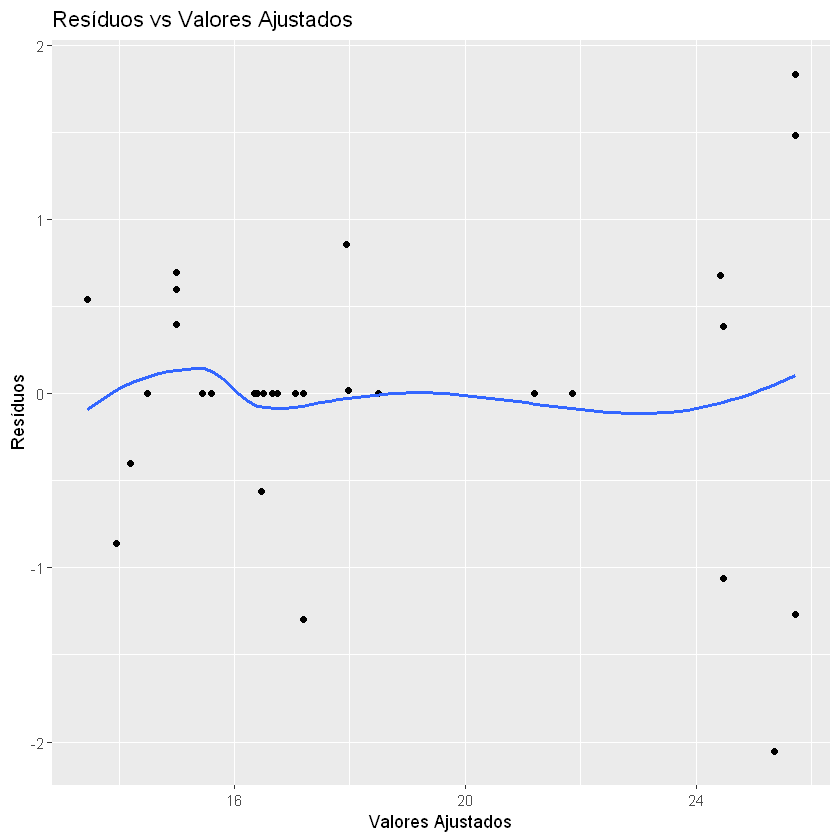

In [38]:
# Gráfico de Resíduos vs Valores Ajustados
# Este gráfico ajuda a verificar a suposição de homocedasticidade. 
# Você espera ver pontos que não exibam nenhum padrão claro.
ggplot(dados_treino, aes(x = predict(modelo_2), y = residuos)) +
  geom_point() +
  geom_smooth(method = 'loess', se = FALSE, formula = y ~ x) +
  ggtitle('Resíduos vs Valores Ajustados') +
  xlab('Valores Ajustados') +
  ylab('Resíduos')

**Cada ponto no gráfico:** Cada ponto no gráfico representa uma observação nos seus dados. O eixo x desse ponto é o valor predito (ajustado) pelo modelo para essa observação, e o eixo y é o resíduo correspondente para essa observação.

**A linha suavizada (gerada pelo método 'loess' no geom_smooth)** acompanha os pontos no gráfico e oferece uma representação visual da tendência geral nos dados. Ela é uma estimativa suavizada da relação entre os valores ajustados (previstos pelo modelo) e os resíduos.

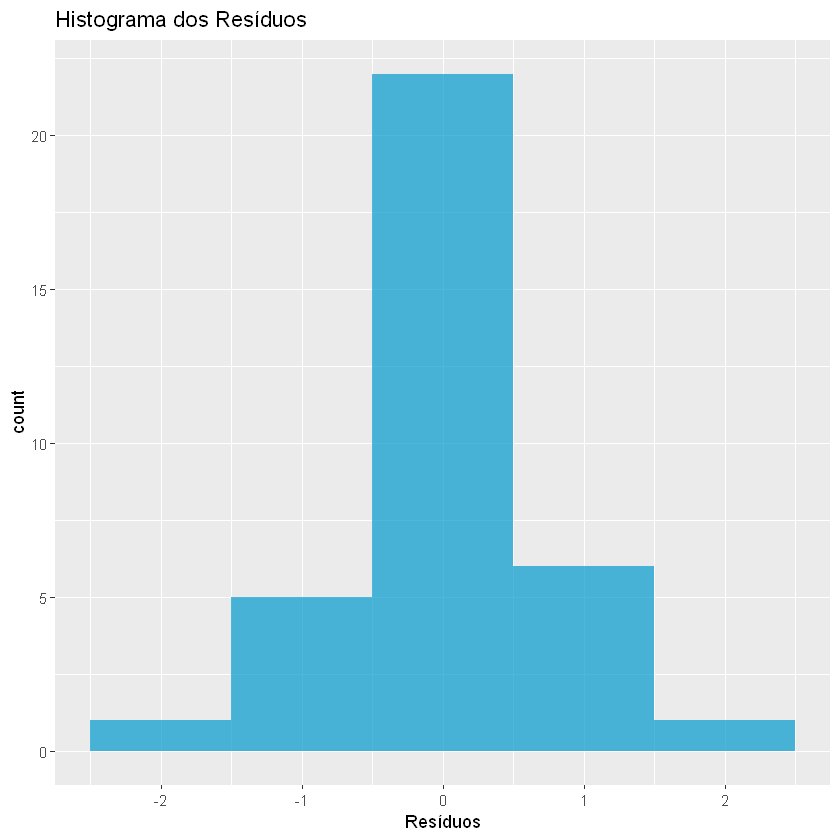

In [39]:
# Histograma dos Resíduos
# Este gráfico ajuda a verificar a normalidade dos resíduos. 
# Um histograma em forma de sino indica que os resíduos estão normalmente distribuídos, indicando que temos um 
# bom modelo de regressão.
ggplot(dados_treino, aes(x = residuos)) +
  geom_histogram(binwidth = 1, fill = 'deepskyblue3', alpha = 0.7) +
  ggtitle('Histograma dos Resíduos') +
  xlab('Resíduos')

### Interpretação

- Ao analisar a performance do nosso modelo de regressão linear, as métricas **Mean Squared Error (MSE) e Root Mean Squared Error (RMSE)** revelam resultados promissores, indicando que o modelo gerado apresenta um bom desempenho.
- O **MSE**, calculado como a média dos quadrados dos erros entre as previsões do modelo e os valores reais, apresentou um valor de 2.51. **O RMSE**, derivado diretamente do MSE, proporciona uma interpretação mais intuitiva ao expressar o erro médio em termos da unidade da variável dependente. Com um RMSE de 1.58, podemos afirmar que, em média, as previsões do modelo estão desviando apenas 1.58 unidades da realidade observada.
- Além disso, podemos afirmar que os fatores considerados no modelo têm uma influência estatisticamente significativa na variável de interesse. Isso é indicado pelos valores-p muito baixos associados a cada preditor, sugerindo que a probabilidade de esses resultados ocorrerem ao acaso é extremamente baixa.
- Além disso, **o modelo como um todo apresenta significância estatística**, como evidenciado pelo valor-p muito baixo para a estatística F. Essa estatística avalia a importância global do modelo, considerando o impacto coletivo de todos os fatores. O valor-p descrito sugere que o modelo proporciona um ajuste eficaz aos dados.
- O **Multiple R-squared** reforça a qualidade global do modelo, indicando que cerca de 96,53% da variabilidade na variável dependente é explicada pelos preditores incluídos. 
- Por fim, ao analisarmos os resíduos gerados pelo modelo de regressão linear, observamos duas importantes suposições que contribuem para a confiabilidade no modelo: **podemos afirmar que os resíduos seguem a suposição de normalidade**, apresentando uma distribuição simétrica e aproximadamente normal. Além disso, **a dispersão dos resíduos demonstra homocedasticidade**, indicando uma consistência na dispersão dos resíduos em toda a faixa de valores preditos pelo modelo. 